In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
from datetime import datetime
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [9]:
from pandas_datareader import data, wb

In [16]:
end=datetime.now()
start=datetime(int(end.year)-1,int(end.month),int(end.day))

In [17]:
for stock in tech_list:
    globals()[stock]=data.get_data_yahoo(stock,start,end)

In [20]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,284.270470,277.591491,280.586157,281.223431,3.535918e+07,280.153001
std,51.917240,50.859343,51.384738,51.470458,1.683665e+07,52.026142
min,198.070007,192.580002,195.410004,193.339996,5.481207e+06,191.059784
25%,244.974998,237.189995,240.750000,241.160004,2.428175e+07,240.508949
50%,281.679993,274.869995,277.200012,277.970001,3.113050e+07,277.219574
75%,319.720001,315.175003,316.979996,318.024994,4.110965e+07,316.983475
max,399.820007,386.970001,396.690002,393.429993,1.067212e+08,393.429993


In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-07-29 to 2020-07-30
Data columns (total 6 columns):
High         255 non-null float64
Low          255 non-null float64
Open         255 non-null float64
Close        255 non-null float64
Volume       255 non-null float64
Adj Close    255 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


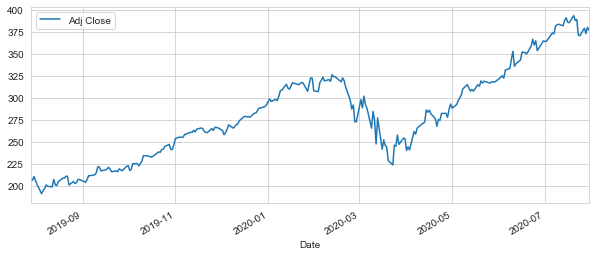

In [22]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

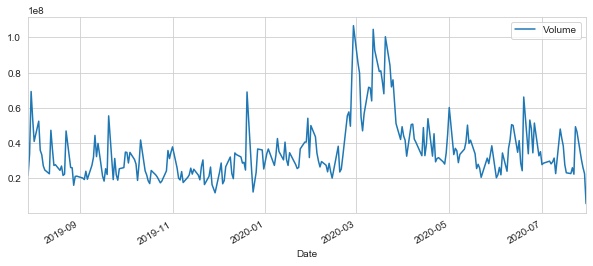

In [23]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [25]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days"%(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

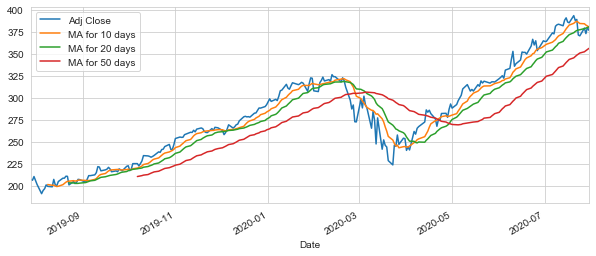

In [27]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

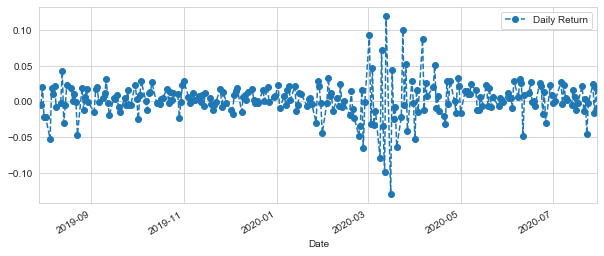

In [29]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

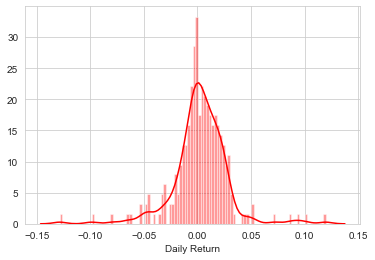

In [30]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

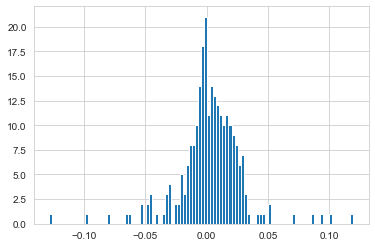

In [31]:
AAPL['Daily Return'].hist(bins=100)

In [32]:
closing_df=data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [33]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-29,207.207077,1239.410034,139.315674,1912.449951
2019-07-30,206.317688,1225.140015,138.643936,1898.530029
2019-07-31,210.527466,1216.680054,134.613541,1866.780029
2019-08-01,205.971817,1209.010010,136.381760,1855.319946
2019-08-02,201.613846,1193.989990,135.235855,1823.239990


In [34]:
tech_rets=closing_df.pct_change()

In [35]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-29,NaN,NaN,NaN,NaN
2019-07-30,-0.004292,-0.011514,-0.004822,-0.007279
2019-07-31,0.020404,-0.006905,-0.029070,-0.016723
2019-08-01,-0.021639,-0.006304,0.013136,-0.006139
2019-08-02,-0.021158,-0.012423,-0.008402,-0.017291


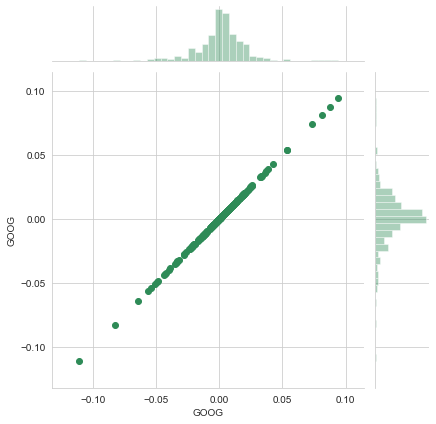

In [37]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

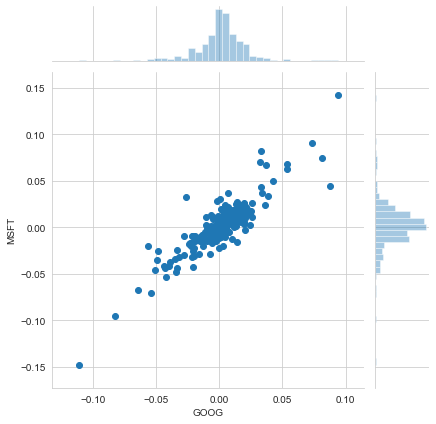

In [38]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [39]:
from IPython.display import SVG

In [40]:
SVG(url='http://upload.wikipedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

<IPython.core.display.SVG object>

In [41]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-29,NaN,NaN,NaN,NaN
2019-07-30,-0.004292,-0.011514,-0.004822,-0.007279
2019-07-31,0.020404,-0.006905,-0.029070,-0.016723
2019-08-01,-0.021639,-0.006304,0.013136,-0.006139
2019-08-02,-0.021158,-0.012423,-0.008402,-0.017291


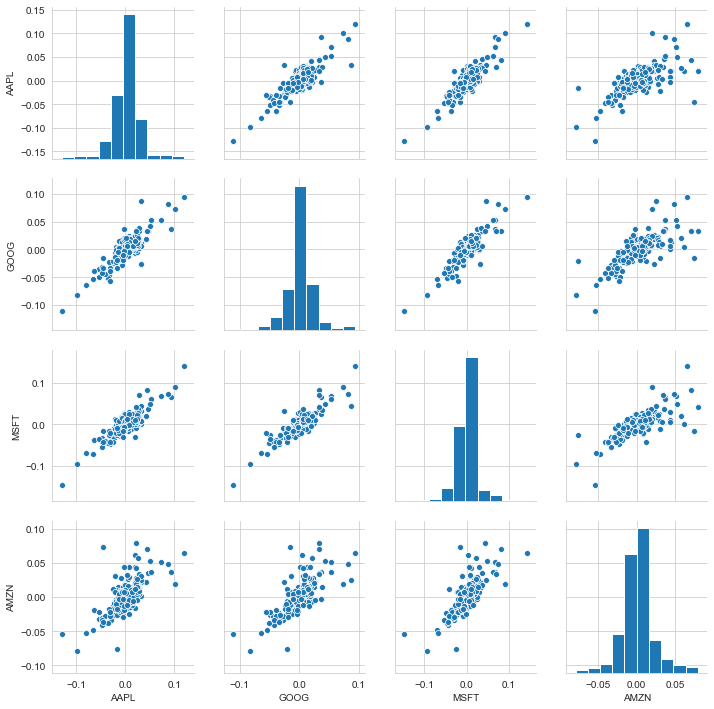

In [43]:
sns.pairplot(tech_rets.dropna())

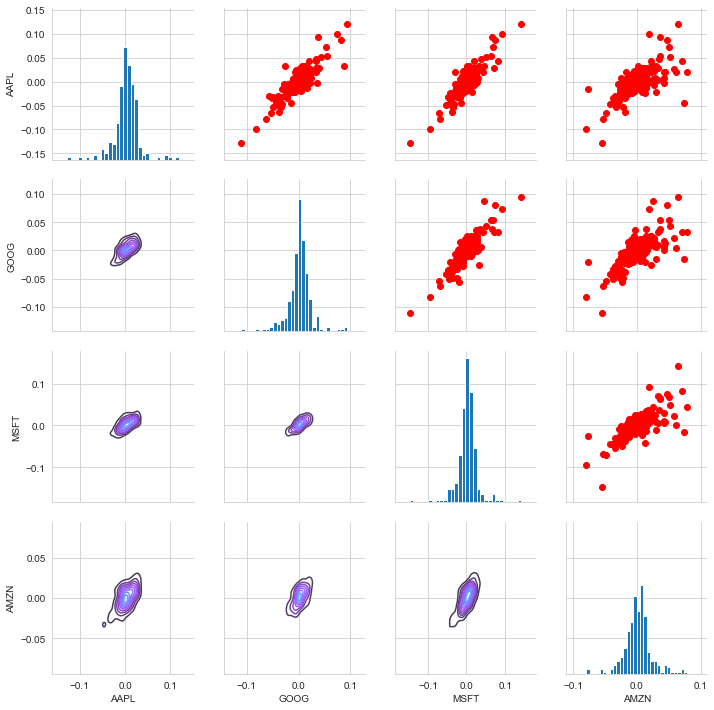

In [45]:
return_fig=sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter,color='red')
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

In [48]:
rets=tech_rets.dropna()

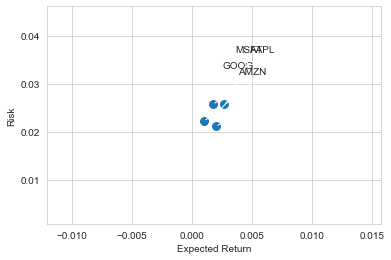

In [50]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',ha='right',va='bottom',arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

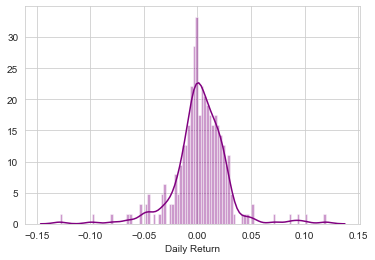

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [52]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-30,-0.004292,-0.011514,-0.004822,-0.007279
2019-07-31,0.020404,-0.006905,-0.029070,-0.016723
2019-08-01,-0.021639,-0.006304,0.013136,-0.006139
2019-08-02,-0.021158,-0.012423,-0.008402,-0.017291
2019-08-05,-0.052348,-0.034900,-0.034258,-0.031872


In [53]:
rets['AAPL'].quantile(0.05)

-0.037065617407709806

In [54]:
days=365
dt=1/365
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [55]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+price[x-1]*(drift[x]+shock[x])
    return price

In [56]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-29,1247.369995,1228.229980,1241.050049,1239.410034,2223700,1239.410034
2019-07-30,1234.869995,1223.300049,1225.410034,1225.140015,1453300,1225.140015
2019-07-31,1234.000000,1207.764038,1223.000000,1216.680054,1725500,1216.680054
2019-08-01,1234.109985,1205.719971,1214.030029,1209.010010,1698500,1209.010010
2019-08-02,1206.900024,1188.939941,1200.739990,1193.989990,1645100,1193.989990


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

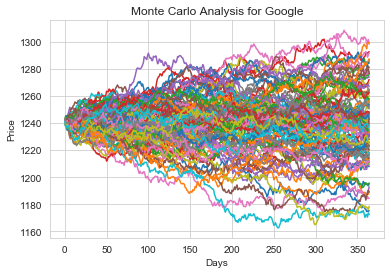

In [57]:
start_price=1241.05
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [58]:
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution of Google Stock after 365 days')

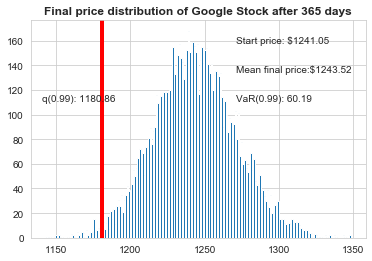

In [63]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f"%start_price)
plt.figtext(0.6,0.7,"Mean final price:$%.2f"%simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): %.2f"%(start_price-q))
plt.figtext(0.15,0.6,"q(0.99): %.2f"%q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u"Final price distribution of Google Stock after %s days"%days,weight='bold')